In [1]:
from xml.dom import minidom
import pandas as pd


In [2]:
file = minidom.parse("hw2-patients.xml")

In [3]:
#Citation: https://www.studytonight.com/python-howtos/how-to-read-xml-file-in-python

In [4]:
models = file.getElementsByTagName('patient')

In [5]:
#print(models[173886].attributes['age'].value)

In [6]:
age = []
for i in models:
    age.append(float(i.attributes['age'].value))
    

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'numbers')

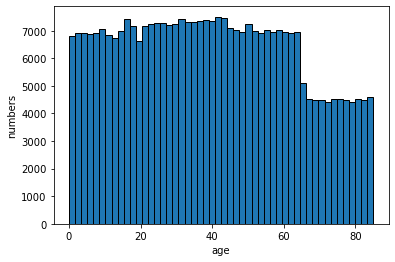

In [8]:
plt.hist(age,bins=50,edgecolor = "black")
plt.xlabel('age')
plt.ylabel('numbers')

In [9]:
# Use set() to eliminate duplicated elements, because a set cannot have duplicated elements. If it returns TRUE,
#which means there is no duplicate in the age list,in turn no patients share the same age.
#Citation: https://stackoverflow.com/questions/1541797/how-do-i-check-if-there-are-duplicates-in-a-flat-list
len(age)==len(set(age))

True

In [11]:
#print(models[1].attributes['gender'].value)

In [12]:
sex = []
for i in models:
    sex.append(i.attributes['gender'].value)

Text(0, 0.5, 'numbers')

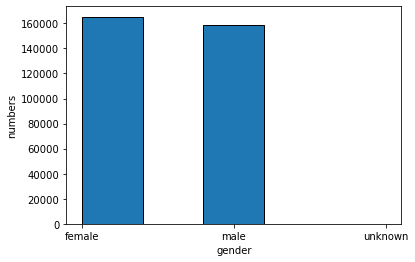

In [13]:
plt.hist(sex,bins=5,edgecolor = "black")
plt.xlabel('gender')
plt.ylabel('numbers')

In [13]:
#The provider uses string to encode gender into three categories: 'female','male', and 'unknown'.

In [14]:
#Sort the patients by age and store the result in a list.
name = []
for i in models:
    name.append(i.attributes['name'].value)
    

In [15]:
#The oldest person is:
patient = list(zip(age,name))

In [16]:
sorted_patient = sorted(patient, key=lambda tup: tup[0])
sorted_patient[-1][1]

'Monica Caponera'

In [50]:
age_sorted = sorted(age)

In [18]:
#dentify the patient who is 41.5 years old
#https://towardsdatascience.com/understanding-time-complexity-with-python-examples-2bda6e8158a7
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
    raise ValueError('Value is not in the list')

In [51]:
binary_search(age_sorted,41.5)

173886

In [20]:
sorted_patient[173886][1]

'John Braswell'

In [21]:
#Find the number of patients who are at least 41.5 years old
len(sorted_patient)-173886

150471

In [22]:
#Generalizing the above, write a function that in O(log n) time returns 
#the number of patients who are at least low_age years old but are strictly 
#less than high_age years old. 

In [23]:
def bisection(data, value):
    n = len(data)
    left = 0
    right = n - 1
    
    while left < right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle 
        else:
            left = middle + 1
    return middle
    raise ValueError('Value is not in the list')
    
def final(data,high,low):
    if high > low:
        return bisection(age_sorted,high)-bisection(age_sorted,low)
    else:
        return False

In [24]:
#Test the function 

In [25]:
final(age_sorted,66,22)

184198

In [26]:
#How to prove? 
#If we use for loop to count how many patients in the age range, the result will be the same as using bisection method.

In [27]:
def for_loop_test(list,high,low):
    # Count is the number of patients who are in the age range.
    count = 0
    # use for loop to traverse the elements in the list.
    for i in range(0,len(list)):
        if list[i][0] < high and list[i][0] >= low:
            count += 1
    return count

In [28]:
for_loop_test(patient,66,22)

184198

In [29]:
#The number of patients who are at least 22 years old but are strictly less than 66 years old is 184198.

In [29]:
#But when we calculate the time, using bisection function is much faster than for loop.
#https://www.cnblogs.com/yucen/p/9912006.html

In [129]:
import time
start = time.time()
for_loop_age(patient,66,22)
end = time.time()
print (end - start)


0.5042462348937988


In [130]:
start = time.time()
final(age_sorted,66,22)
end = time.time()
print (end - start)

0.0031239986419677734


In [32]:
#Returns both the total number of patients in an age range AND the number of males in the age range, 

In [66]:
def bisection2(data, value):
    n = len(data)
    left = 0
    right = n - 1
    
    while left < right:
        middle = (left + right) // 2
        if value < data[middle][0]:
            right = middle 
        else:
            left = middle + 1
    return middle
    raise ValueError('Value is not in the list')

In [67]:
patient2 = list(zip(age,sex))
patient2_sorted  = sorted(patient2, key = lambda tup: tup[0])
male = []
for i in range(len(patient2_sorted)):
    if patient2_sorted[i][1] == 'male':
        male.append(patient2_sorted[i])

In [68]:
def count_male_and_total(data,data2,high,low):
    if high > low:
        return bisection(data,high)-bisection(data,low),bisection2(data2,high)-bisection2(data2,low)
    else:
        return False

In [69]:
count_male_and_total(age_sorted,male,66,22)

(184198, 90378)

In [ ]:
#The total number of patients betweeen 22 years old and 66 years old is 184198 AND the number of males in the age range
#is 90378.

In [ ]:
#Prove
#If we use for loop to count how many males in the age range, the result will be the same as using bisection method.
#Use the same function:for_loop_test

In [70]:
for_loop_test(male,66,22)

90378

In [ ]:
#Describe how (you don't need to implement this, unless that's easier than writing it out) 
#you could find the second oldest person's name in O(n) time. (2 points). 
#Discuss when it might be advantageous to sort and when it is better to just use the O(n) solution. 

In [35]:
#To draw the secondary oldest patient, we need find the oldest patient, which needs O(n) time, and then remove this patient(tuple)
#from the zip_list, which is O(1); and now use the 
#function to find the oldest patient,which needs O(n). The total time consums will be O(n)+O(1)+O(n)=O(n)

In [36]:
#Advantage
#Sort: O(n log n) time, when you have to find different elements in a list many times, you only cost nlogn + n time; sort it first will be great; 
#Not sort: O(n) solution, when you just want to find once 

In [ ]:
#For an extra 2 points: explain how the answer to the question about multiple patients having the same age affects the solution to 
#the rest of the problem.

In [ ]:
#If there are multiple patients having the same age, we can still use binary search, but the search time will be different.
#For example, if multiple patients are 41.5 years old, using binary search can find one 41.5, and then traverse left or right to find the boundary
#of all "41.5" numbers. The total time will be O(n); even in the worst situation that all numbers are the same, it will
#cost n/2 time, still the O(n)time.